## Chapter 13 Compare Machine Learning Algorithms

#### Compare Machine Learning Algorithms Consistently

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
# load dataset
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(filename, names=names)
print(df.shape)
df.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


LR: mean: 0.7721633629528366, std: 0.0496837651757489
LDA: mean: 0.7669685577580315, std: 0.04796563054016723
KNN: mean: 0.7109876965140123, std: 0.0507915093681296
CART: mean: 0.6915071770334927, std: 0.042832937994237895
NB: mean: 0.7591421736158578, std: 0.03895993346035058
SVM: mean: 0.760457963089542, std: 0.03471186731025681


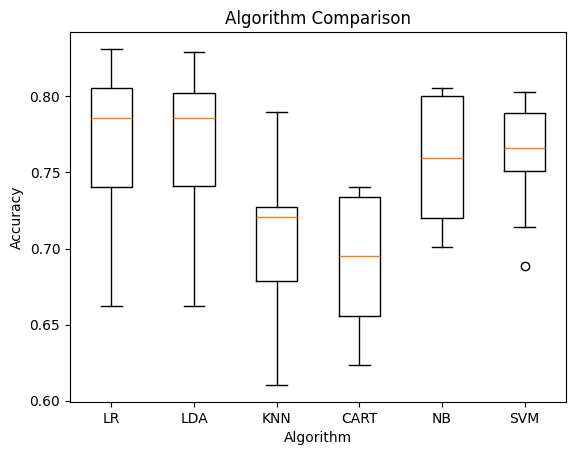

In [11]:
# Compare algorithms
array = df.values
X = array[:, :-1]
Y = array[:, -1]
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, shuffle=True, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f'{name}: mean: {cv_results.mean()}, std: {cv_results.std()}')
# boxplot algorithm comparison
plt.figure()
plt.boxplot(results)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(names)+1), names)
plt.show()

From these results, it would suggest that both logistic regression and linear discriminant analysis are perhaps worthy of further study on this problem.